# Import necessary modules 

In [1]:
%matplotlib inline
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from ganrectf.utils import angles, nor_tomo
from ganrectf.ganrec_diffuser import GANtomo


# Read the data 

In [2]:
prj = tifffile.imread('./test_data/tooth.tiff')
nang, px = prj.shape
ang = angles(nang)
prj = nor_tomo(prj)

# Reconstruct the data with the ganrec algorithm

Input shape: (None, 400, 400, 1)
x32 shape: (None, 200, 200, 128)
x16 shape: (None, 200, 200, 128)
x8 shape: (None, 100, 100, 128)
x8 shape: (None, 100, 100, 128)


Reconstruction Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

ValueError: in user code:

    File "/nsls2/users/xyang4/ganrec/ganrectf/ganrec_diffuser.py", line 130, in recon_step  *
        fake_output = self.discriminator(prj_rec, training=True)
    File "/nsls2/users/xyang4/conda_envs/tf-tomopy/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/nsls2/users/xyang4/conda_envs/tf-tomopy/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 181, 400, 1), found shape=(100, 543, 400, 1)


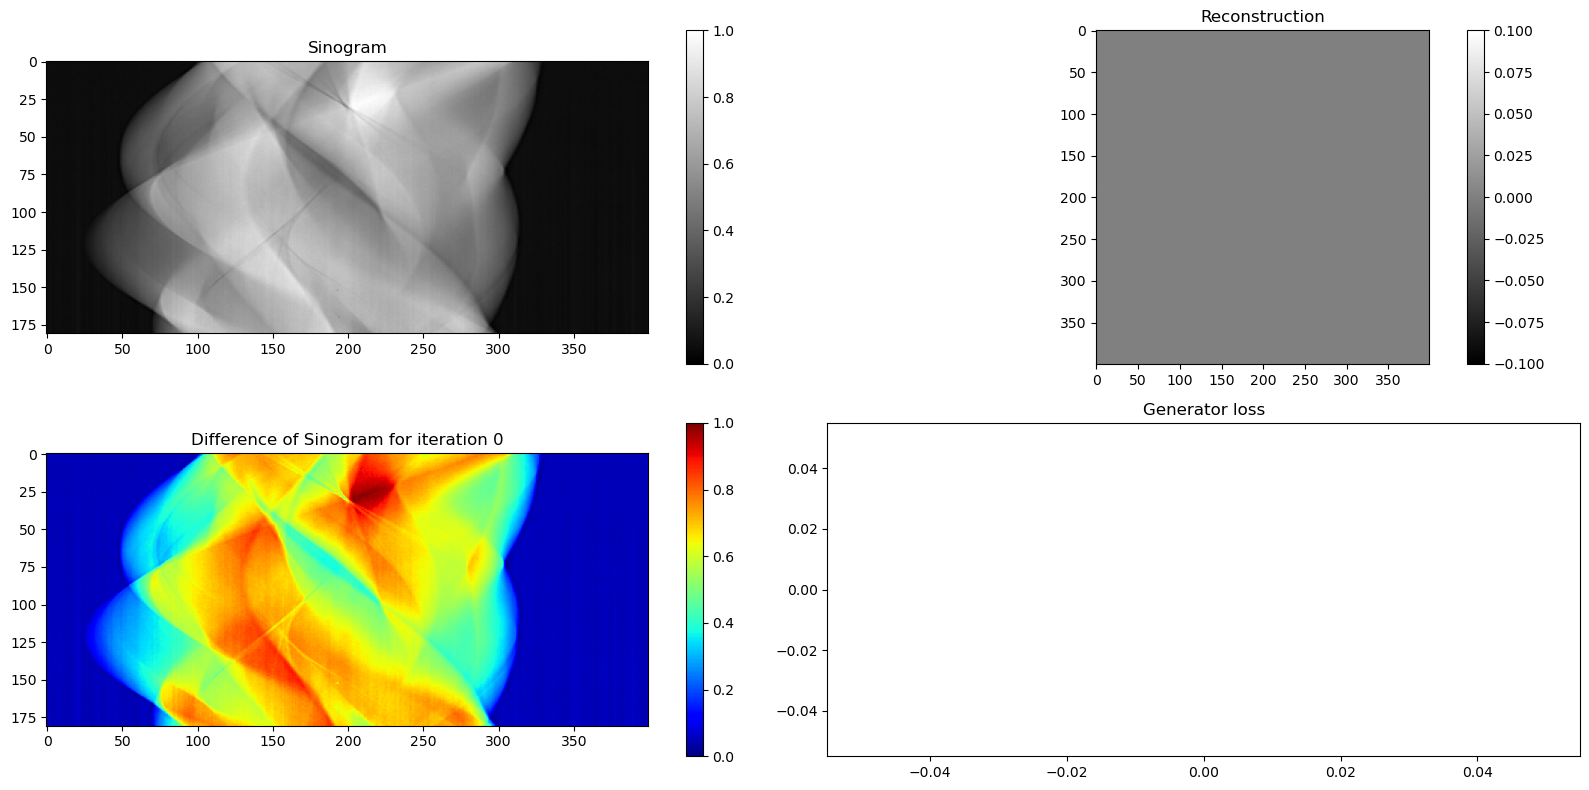

In [3]:
rec = GANtomo(prj, ang, iter_num=1000).recon
plt.imshow(rec)
plt.show()
tifffile.imwrite('./test_results/recon_tooth.tiff', rec)